<a href="https://colab.research.google.com/github/sweetiepickle/AI-10-4-23-CNN/blob/main/AI_10_4_23_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test)= fashion_mnist.load_data()

In [2]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)


In [3]:
x_train = x_train.reshape(60000,28,28,1)    # chuyển thành 1 kênh màu
x_test = x_test.reshape(10000,28,28,1)

In [4]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


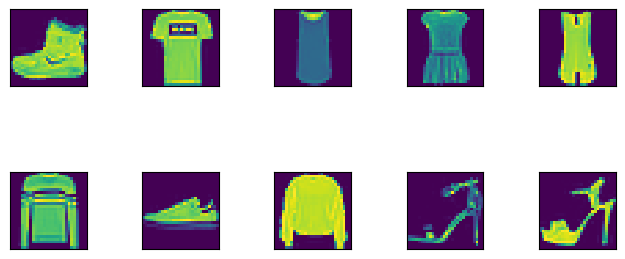

In [5]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.subplot(3,5,i+1)  
  plt.tight_layout()
  plt.imshow(x_train[i], interpolation= 'none')
  plt.xticks([])
  plt.yticks([])

In [6]:
x_train= x_train.reshape(60000, 28,28,1)
x_train= x_train.astype('float32')/255
x_test= x_test.reshape(10000, 28,28,1)
x_test= x_test.astype('float32')/255
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
from keras.utils import to_categorical      # one hot encoding     Converts a class vector (integers) to binary class matrix.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print (y_train.shape)
print (y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
from keras.models import Sequential
from tensorflow.python.keras.models import Input
from keras import Input
from keras.models import Model
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPooling2D ,Normalization
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [9]:
batch_size = 64
epochs = 20
classes = 10

In [10]:
# 1st
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3) , activation = 'linear' , input_shape = (28,28,1) , padding = 'same'))
# 32 lần tích chập
# bộ lọc 3x3
# padding xong kích thước vẫn như cũ
model.add(LeakyReLU (alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [11]:
# 2nd
model.add(Conv2D(64, kernel_size = (3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU (alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [12]:
# 3rd
model.add(Conv2D(128, kernel_size = (3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU (alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [13]:
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes , activation = 'softmax'))

In [14]:
from tensorflow.keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [17]:
train = model.fit(x_train, y_train , batch_size, epochs = epochs , verbose = 1)
# verbose = 0 ko hiển thị gì
# verbose = 1 hiển thị những gì học đc
# verbose = 2 chỉ hiển thị những gì vừa học

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0290 - accuracy: 0.9898
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9890
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0239 - accuracy: 0.9917
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0263 - accuracy: 0.9905
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0250 - accuracy: 0.9912
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0253 - accuracy: 0.9909
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0263 - accuracy: 0.9909
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0202 - accuracy: 0.9927
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0168 - accuracy: 0.9943
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0259 - accuracy: 0.9911

In [18]:
model.save('/content/drive/MyDrive/model AI/cnn.h5')